In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


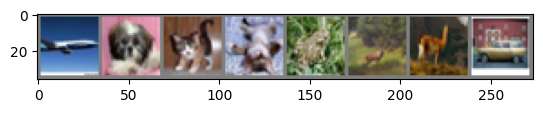

plane   dog   dog   cat  frog  deer  bird   car


In [3]:
# The function to show an image.
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images.
dataiter = iter(trainloader)
images, labels = next(dataiter)
# Show images.
imshow(torchvision.utils.make_grid(images))
# Print labels.
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [4]:
# # scale pixels
# def prep_pixels(train, test):
#     # convert from integers to floats
#     train_norm = train.astype('float32')
#     test_norm = test.astype('float32')
#     # normalize to range 0-1
#     train_norm = train_norm / 255.0
#     test_norm = test_norm / 255.0
#     # return normalized images
#     return train_norm, test_norm


# prep_pixels(testset, testloader)

'COMMAND / !!!!'

#torchvision.datasets.CIFAR10?

'COMMAND / !!!!'

In [4]:
# If there are GPUs, choose the first one for computing. Otherwise use CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
# If 'cuda:0' is printed, it means GPU is available.

cpu


In [65]:
class Net(nn.Module): # Standard from hw4
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 10, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(10)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(20)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.lin1 = nn.Linear(20*8*8, 100)
        self.lin2 = nn.Linear(100, 10)
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = nn.functional.relu(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = nn.functional.relu(x)
        x = self.pool2(x)
        
        x = x.view(-1, 20*8*8)
        
        x = self.lin1(x)
        x = nn.functional.relu(x)
        x = self.lin2(x)
             
        return x

net = Net()     # Create the network instance.
net.to(device)  # Move the network parameters to the specified device.

Net3(
  (conv1): Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2a): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2a): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv3a): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3a): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2b): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool2b): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3b): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3b): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (lin1a): Linear(in_features=512, out_features=100, bias=True)
  (lin1b): Linear(in_features=512, out_features=100, bias=True)
  (lin2): Linear(in_features=200, out_features=50, bias=True)
  (lin3): Linear(in_features=50, out_fea

In [149]:
class Net2(nn.Module): # Max pooling, larger kernels, wider
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.lin1 = nn.Linear(32 * 8 * 8, 64)
        self.lin2 = nn.Linear(64, 10)
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = nn.functional.relu(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = nn.functional.relu(x)
        x = self.pool2(x)
        
        x = x.view(-1, 32 * 8 * 8)
        
        x = self.lin1(x)
        x = nn.functional.relu(x)
        x = self.lin2(x)
        
        return x

net2 = Net2()     # Create the network instance.
net2.to(device)  # Move the network parameters to the specified device.

Net2(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (lin1): Linear(in_features=2048, out_features=64, bias=True)
  (lin2): Linear(in_features=64, out_features=10, bias=True)
)

In [99]:
class Net3(nn.Module): # Parallel convolution
    def __init__(self):
        super(Net3, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 16, kernel_size=7, stride=1, padding=3)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # ALSO DO A 4x4 coverage avg layer?
        
        self.conv2a = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        # self.poolA = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv3a = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        self.bnA = nn.BatchNorm2d(32)
        self.poolA = nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.conv2b = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        # self.poolB = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3b = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        self.bnB = nn.BatchNorm2d(32)
        self.poolB = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # self.conv4 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        
        self.lin1a = nn.Linear(32*8*8, 100)
        self.lin1b = nn.Linear(32*8*8, 100)
        # self.lin1 = nn.Linear((32*4*4)+(32*4*4), 200)
        self.lin2 = nn.Linear(200, 50)
        self.lin3 = nn.Linear(50, 10)
        
        self.dropout7 = nn.Dropout(p=0.7)
        self.dropout5 = nn.Dropout(p=0.5)
        self.dropout3 = nn.Dropout(p=0.3)
        
        # output_size = (input_size - kernel_size + 2 * padding) / stride + 1
        
        
    def forward(self, x):
        x1 = self.conv1(x)
        x1 = self.bn1(x1)
        x1 = nn.functional.relu(x1)
        x1 = self.pool1(x1)
        
        
        x2a = self.conv2a(x1)
        x2a = nn.functional.relu(x2a)
        # x2a = self.pool2a(x2a)
        
        x3a = self.conv3a(x2a)
        x3a = nn.functional.relu(x3a)
        x3a = self.bnA(x3a)
        x3a = self.poolA(x3a)
        
        # xF2a = x2a.view(-1, 32*7*7)
        # xF2a = self.lin1a(xF2a)
        xa = x3a.view(-1, 32*8*8)
        xa = self.lin1a(xa)
        
        
        x2b = self.conv2b(x1)
        x2b = nn.functional.relu(x2b)
        # x2b = self.pool2b(x2b)
        
        x3b = self.conv3b(x2b)
        x3b = nn.functional.relu(x3b)
        x3b = self.bnB(x3b)
        x3b = self.poolB(x3b)
        
        # xF2b = x2b.view(-1, 32*6*6)
        # xF2b = self.lin1b(xF2b)
        xb = x3b.view(-1, 32*8*8)
        xb = self.lin1b(xb)
        
        # diff lengths are fine if linear sizes are balanced
        # like both 32x4x4 and 32x8x8 can condense to 100
        
        ###############
        # maybe just convolve both of these
        ###############
        
        # xF = 
        
        xF = torch.cat([xa, xb], dim=1)
        xF = self.dropout5(xF)
        xF = nn.functional.relu(xF)
        xF = self.lin2(xF)
        xF = self.lin3(xF)
        
        return xF

net3 = Net3()     # Create the network instance.
net3.to(device)  # Move the network parameters to the specified device.

Net3(
  (conv1): Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2a): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3a): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnA): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (poolA): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2b): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3b): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnB): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (poolB): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (lin1a): Linear(in_features=2048, out_features=100, bias=True)
  (lin1b): Linear(in_features=2048, out_featu

# TRAINING + TESTING

# NET 1

In [84]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(net.parameters(), lr=0.0005, momentum=0.8) 

In [85]:
avg_losses = []   # Avg. losses.
epochs = 5       # Total epochs.
print_freq = 1000  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:   999] avg mini-batch loss: 0.227
[epoch: 0, i:  1999] avg mini-batch loss: 0.234
[epoch: 0, i:  2999] avg mini-batch loss: 0.247
[epoch: 0, i:  3999] avg mini-batch loss: 0.250
[epoch: 0, i:  4999] avg mini-batch loss: 0.237
[epoch: 0, i:  5999] avg mini-batch loss: 0.241
[epoch: 0, i:  6999] avg mini-batch loss: 0.269
[epoch: 0, i:  7999] avg mini-batch loss: 0.260
[epoch: 0, i:  8999] avg mini-batch loss: 0.266
[epoch: 0, i:  9999] avg mini-batch loss: 0.263
[epoch: 0, i: 10999] avg mini-batch loss: 0.251
[epoch: 0, i: 11999] avg mini-batch loss: 0.262
[epoch: 1, i:   999] avg mini-batch loss: 0.229
[epoch: 1, i:  1999] avg mini-batch loss: 0.223
[epoch: 1, i:  2999] avg mini-batch loss: 0.235
[epoch: 1, i:  3999] avg mini-batch loss: 0.216
[epoch: 1, i:  4999] avg mini-batch loss: 0.218
[epoch: 1, i:  5999] avg mini-batch loss: 0.243
[epoch: 1, i:  6999] avg mini-batch loss: 0.226
[epoch: 1, i:  7999] avg mini-batch loss: 0.249
[epoch: 1, i:  8999] avg mini-batch loss

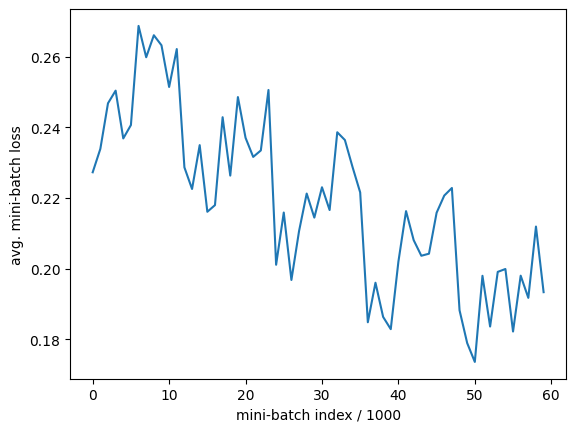

In [86]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

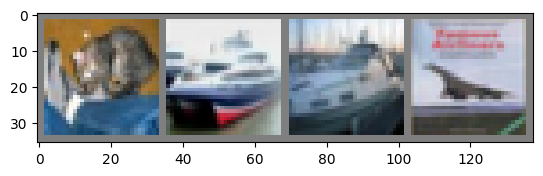

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane


In [87]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [159]:
# Get test accuracy. - was 66 before batch norm, 67 after, 68/69 w smaller learning rates and more epochs
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 68 %


In [160]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 75 %
Accuracy of   car : 80 %
Accuracy of  bird : 58 %
Accuracy of   cat : 47 %
Accuracy of  deer : 62 %
Accuracy of   dog : 55 %
Accuracy of  frog : 75 %
Accuracy of horse : 73 %
Accuracy of  ship : 80 %
Accuracy of truck : 75 %


# NET 2

In [178]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(net2.parameters(), lr=0.0005, momentum=0.7) 

In [179]:
avg_losses = []   # Avg. losses.
epochs = 5       # Total epochs.
print_freq = 1000  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net2(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:   999] avg mini-batch loss: 0.135
[epoch: 0, i:  1999] avg mini-batch loss: 0.128
[epoch: 0, i:  2999] avg mini-batch loss: 0.128
[epoch: 0, i:  3999] avg mini-batch loss: 0.123
[epoch: 0, i:  4999] avg mini-batch loss: 0.130
[epoch: 0, i:  5999] avg mini-batch loss: 0.126
[epoch: 1, i:   999] avg mini-batch loss: 0.111
[epoch: 1, i:  1999] avg mini-batch loss: 0.103
[epoch: 1, i:  2999] avg mini-batch loss: 0.111
[epoch: 1, i:  3999] avg mini-batch loss: 0.117
[epoch: 1, i:  4999] avg mini-batch loss: 0.114
[epoch: 1, i:  5999] avg mini-batch loss: 0.110
[epoch: 2, i:   999] avg mini-batch loss: 0.092
[epoch: 2, i:  1999] avg mini-batch loss: 0.107
[epoch: 2, i:  2999] avg mini-batch loss: 0.103
[epoch: 2, i:  3999] avg mini-batch loss: 0.101
[epoch: 2, i:  4999] avg mini-batch loss: 0.105
[epoch: 2, i:  5999] avg mini-batch loss: 0.106
[epoch: 3, i:   999] avg mini-batch loss: 0.091
[epoch: 3, i:  1999] avg mini-batch loss: 0.091
[epoch: 3, i:  2999] avg mini-batch loss

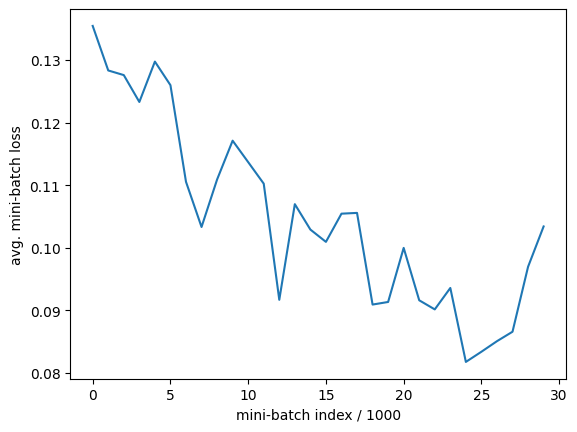

In [180]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

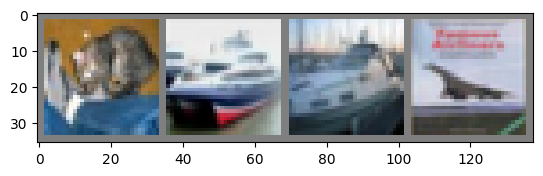

GroundTruth:    cat  ship  ship plane
Predicted:    cat   car  ship plane


In [181]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net2(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [182]:
# Get test accuracy.  72 -> 70 -> 71
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 71 %


In [183]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net2(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 75 %
Accuracy of   car : 79 %
Accuracy of  bird : 59 %
Accuracy of   cat : 56 %
Accuracy of  deer : 67 %
Accuracy of   dog : 58 %
Accuracy of  frog : 76 %
Accuracy of horse : 75 %
Accuracy of  ship : 82 %
Accuracy of truck : 82 %


## TESTING COMBINED

In [177]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs1 = F.normalize(net(images), p=2, dim=1)
        outputs2 = F.normalize(net2(images), p=2, dim=1)
        # print(outputs1.data)
        # outputs = torch.cat((outputs1, outputs2), dim=1)
        outputs = torch.add(outputs1, outputs2)
        # print(outputs.data)
        _, predicted = torch.max(outputs, 1)
        predicted = predicted%10
        # print(predicted, predictedn, labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

# SHOULD WE NORM OUTPUTS BEFORE THIS ??!
# WE CAN ALSO ADJUST LEARNING RATE AS WE PROCEED THROUGH THE DATA - PERHAPS IN REAL-TIME BY NATURE OF AN ALGORITHM?!

# 1,1 = 73
# 2,1 = 68
# 1,2 = 72
# 2,2 = 73


# using torch.add = 74
# vs 73

Accuracy of the network on the 10000 test images: 73 %


In [169]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs1 = F.normalize(net(images), p=2, dim=1)
        outputs2 = F.normalize(net2(images), p=2, dim=1)
        outputs = torch.cat((outputs1, outputs2), dim=1)
        _, predicted = torch.max(outputs, 1)
        predicted = predicted%10
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    
    
# Accuracy of plane : 77 % -> 77
# Accuracy of   car : 83 % -> 83
# Accuracy of  bird : 65 % -> 66
# Accuracy of   cat : 50 % -> 50
# Accuracy of  deer : 69 % -> 70
# Accuracy of   dog : 60 % -> 60
# Accuracy of  frog : 80 % -> 81
# Accuracy of horse : 80 % -> 81
# Accuracy of  ship : 84 % -> 84
# Accuracy of truck : 83 % -> 83

Accuracy of plane : 77 %
Accuracy of   car : 83 %
Accuracy of  bird : 66 %
Accuracy of   cat : 50 %
Accuracy of  deer : 70 %
Accuracy of   dog : 60 %
Accuracy of  frog : 81 %
Accuracy of horse : 81 %
Accuracy of  ship : 84 %
Accuracy of truck : 83 %


## NETWORK 3

In [138]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(net3.parameters(), lr=0.0001, momentum=0.4) 

avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 1000  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net3(inputs)
        # print(inputs.shape, outputs.shape)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:   999] avg mini-batch loss: 0.195
[epoch: 0, i:  1999] avg mini-batch loss: 0.211
[epoch: 0, i:  2999] avg mini-batch loss: 0.204
[epoch: 0, i:  3999] avg mini-batch loss: 0.212
[epoch: 0, i:  4999] avg mini-batch loss: 0.204
[epoch: 0, i:  5999] avg mini-batch loss: 0.204
[epoch: 1, i:   999] avg mini-batch loss: 0.205
[epoch: 1, i:  1999] avg mini-batch loss: 0.198
[epoch: 1, i:  2999] avg mini-batch loss: 0.197
[epoch: 1, i:  3999] avg mini-batch loss: 0.191
[epoch: 1, i:  4999] avg mini-batch loss: 0.204
[epoch: 1, i:  5999] avg mini-batch loss: 0.198
[epoch: 2, i:   999] avg mini-batch loss: 0.199
[epoch: 2, i:  1999] avg mini-batch loss: 0.195
[epoch: 2, i:  2999] avg mini-batch loss: 0.204
[epoch: 2, i:  3999] avg mini-batch loss: 0.198
[epoch: 2, i:  4999] avg mini-batch loss: 0.211
[epoch: 2, i:  5999] avg mini-batch loss: 0.204
[epoch: 3, i:   999] avg mini-batch loss: 0.197
[epoch: 3, i:  1999] avg mini-batch loss: 0.200
[epoch: 3, i:  2999] avg mini-batch loss

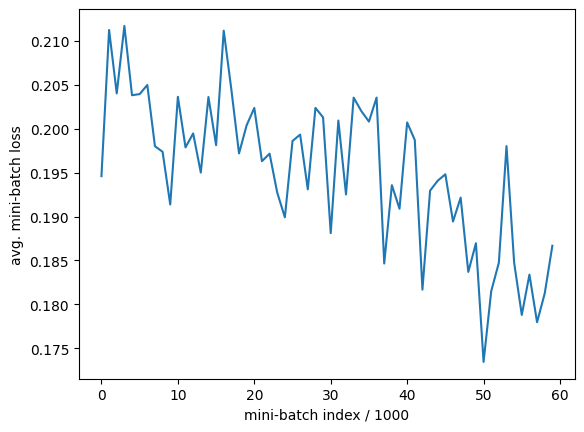

In [139]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

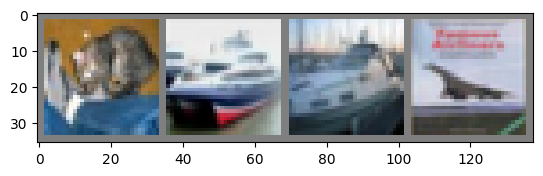

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship plane plane


In [140]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net3(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [141]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 70 %


In [142]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net3(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 75 %
Accuracy of   car : 83 %
Accuracy of  bird : 60 %
Accuracy of   cat : 50 %
Accuracy of  deer : 63 %
Accuracy of   dog : 57 %
Accuracy of  frog : 75 %
Accuracy of horse : 76 %
Accuracy of  ship : 82 %
Accuracy of truck : 81 %


## GOOGLE NET

In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class InceptionModule(nn.Module):
    def __init__(self, in_channels, out_channels1x1, reduce_channels3x3, out_channels3x3, reduce_channels5x5, out_channels5x5, out_channels_pool):
        super(InceptionModule, self).__init__()
        
        # 1x1 convolution branch
        self.branch1x1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels1x1, kernel_size=1),
            nn.BatchNorm2d(out_channels1x1),
            nn.ReLU(inplace=True)
        )
        
        # 3x3 convolution branch
        self.branch3x3 = nn.Sequential(
            nn.Conv2d(in_channels, reduce_channels3x3, kernel_size=1),
            nn.BatchNorm2d(reduce_channels3x3),
            nn.ReLU(inplace=True),
            nn.Conv2d(reduce_channels3x3, out_channels3x3, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels3x3),
            nn.ReLU(inplace=True)
        )
        
        # 5x5 convolution branch
        self.branch5x5 = nn.Sequential(
            nn.Conv2d(in_channels, reduce_channels5x5, kernel_size=1),
            nn.BatchNorm2d(reduce_channels5x5),
            nn.ReLU(inplace=True),
            nn.Conv2d(reduce_channels5x5, out_channels5x5, kernel_size=5, padding=2),
            nn.BatchNorm2d(out_channels5x5),
            nn.ReLU(inplace=True)
        )
        
        # max pooling branch
        self.branch_pool = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, out_channels_pool, kernel_size=1),
            nn.BatchNorm2d(out_channels_pool),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        branch1x1 = self.branch1x1(x)
        branch3x3 = self.branch3x3(x)
        branch5x5 = self.branch5x5(x)
        branch_pool = self.branch_pool(x)
        outputs = [branch1x1, branch3x3, branch5x5, branch_pool]
        return torch.cat(outputs, 1)

class GoogleNet(nn.Module):
    def __init__(self, num_classes=10):
        super(GoogleNet, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.maxpool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=1)
        self.conv3 = nn.Conv2d(64, 192, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        self.inception3a = InceptionModule(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = InceptionModule(256, 128, 128, 192, 32, 96, 64)
        self.maxpool3 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        self.inception4a = InceptionModule(480, 192, 96, 208, 16, 48, 64)
        self.inception4b = InceptionModule(512, 160, 112, 224, 24, 64, 64)
        self.inception4c = InceptionModule(512, 128, 128, 256, 24, 64, 64)
        self.inception4d = InceptionModule(512, 112, 144, 288, 32, 64, 64)
        self.inception4e = InceptionModule(528, 256, 160, 320, 32, 128, 128)
        self.maxpool4 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        self.inception5a = InceptionModule(832, 256, 160, 320, 32, 128, 128)
        self.inception5b = InceptionModule(832, 384, 192, 384, 48, 128, 128)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(1024, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = self.maxpool2(x)
        
        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.maxpool3(x)
        
        x = self.inception4a(x)
        x = self.inception4b(x)
        x = self.inception4c(x)
        x = self.inception4d(x)
        x = self.inception4e(x)
        x = self.maxpool4(x)
        
        x = self.inception5a(x)
        x = self.inception5b(x)
        
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

        
netG = GoogleNet()     # Create the network instance.
netG.to(device)  # Move the network parameters to the specified device.

GoogleNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
  (conv3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (inception3a): InceptionModule(
    (branch1x1): Sequential(
      (0): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (branch3x3): Sequential(
      (0): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1))
      (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, a

In [57]:
# # We use cross-entropy as loss function.
# loss_func = nn.CrossEntropyLoss()  
# # We use stochastic gradient descent (SGD) as optimizer.
# opt = optim.SGD(netG.parameters(), lr=0.001, momentum=0.9) 

# avg_losses = []   # Avg. losses.
# epochs = 10       # Total epochs.
# print_freq = 1000  # Print frequency.

# for epoch in range(epochs):  # Loop over the dataset multiple times.
#     running_loss = 0.0       # Initialize running loss.
#     for i, data in enumerate(trainloader, 0):
#         # Get the inputs.
#         inputs, labels = data
        
#         # Move the inputs to the specified device.
#         inputs, labels = inputs.to(device), labels.to(device)
        
#         # Zero the parameter gradients.
#         opt.zero_grad()

#         # Forward step.
#         outputs = netG(inputs)
#         # print(inputs.shape, outputs.shape)
#         loss = loss_func(outputs, labels)
        
#         # Backward step.
#         loss.backward()
        
#         # Optimization step (update the parameters).
#         opt.step()

#         # Print statistics.
#         running_loss += loss.item()
#         if i % print_freq == print_freq - 1: # Print every several mini-batches.
#             avg_loss = running_loss / print_freq
#             print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
#                 epoch, i, avg_loss))
#             avg_losses.append(avg_loss)
#             running_loss = 0.0

# print('Finished Training.')

[epoch: 0, i:   999] avg mini-batch loss: 2.684
[epoch: 0, i:  1999] avg mini-batch loss: 2.760
[epoch: 0, i:  2999] avg mini-batch loss: 2.732
[epoch: 0, i:  3999] avg mini-batch loss: 2.689
[epoch: 0, i:  4999] avg mini-batch loss: 2.656
[epoch: 0, i:  5999] avg mini-batch loss: 2.609
[epoch: 0, i:  6999] avg mini-batch loss: 2.568
[epoch: 0, i:  7999] avg mini-batch loss: 2.534
[epoch: 0, i:  8999] avg mini-batch loss: 2.500
[epoch: 0, i:  9999] avg mini-batch loss: 2.458
[epoch: 0, i: 10999] avg mini-batch loss: 2.436
[epoch: 0, i: 11999] avg mini-batch loss: 2.405
[epoch: 1, i:   999] avg mini-batch loss: 2.361
[epoch: 1, i:  1999] avg mini-batch loss: 2.347
[epoch: 1, i:  2999] avg mini-batch loss: 2.309
[epoch: 1, i:  3999] avg mini-batch loss: 2.313
[epoch: 1, i:  4999] avg mini-batch loss: 2.259
[epoch: 1, i:  5999] avg mini-batch loss: 2.270
[epoch: 1, i:  6999] avg mini-batch loss: 2.244
[epoch: 1, i:  7999] avg mini-batch loss: 2.243
[epoch: 1, i:  8999] avg mini-batch loss

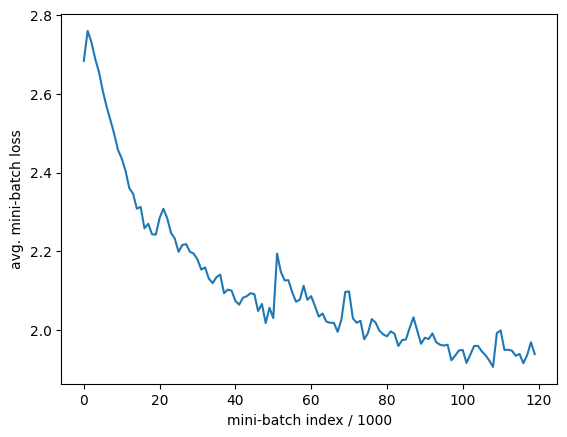

In [58]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

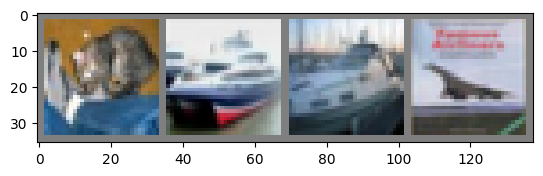

GroundTruth:    cat  ship  ship plane
Predicted:    dog truck truck  ship


In [59]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = netG(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [60]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = netG(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 28 %


In [61]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = netG(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 18 %
Accuracy of   car : 45 %
Accuracy of  bird : 15 %
Accuracy of   cat : 27 %
Accuracy of  deer : 31 %
Accuracy of   dog : 18 %
Accuracy of  frog : 23 %
Accuracy of horse : 29 %
Accuracy of  ship : 26 %
Accuracy of truck : 51 %


# NET 4

In [203]:
class Net4(nn.Module): # Max pooling, larger kernels, wider
    def __init__(self):
        super(Net4, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # self.skip = nn.Conv2d(3, 16, kernel_size=8, stride=4, padding=2)
        # self.skipBn = nn.BatchNorm2d(8)
        # self.skipPool = nn.AvgPool2d(kernel_size=2, stride=2)
        # output = 16*4*4
        
        
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=5, stride=1, padding=2)
        self.bn5 = nn.BatchNorm2d(256)
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.lin1 = nn.Linear(256 * 4 * 4, 256)
        self.lin2 = nn.Linear(256, 64)
        self.lin3 = nn.Linear(64, 10)
        
        self.drop = nn.Dropout(0.5)
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = nn.functional.relu(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = nn.functional.relu(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = nn.functional.relu(x)
        x = self.pool3(x)
        
        x = self.conv4(x)
        x = self.bn4(x)
        x = nn.functional.relu(x)
        x = self.conv5(x)
        x = self.bn5(x)
        x = nn.functional.relu(x)
        x = self.pool5(x)
        
        x = x.view(-1, 256 * 4 * 4)
        
        x = self.lin1(x)
        x = nn.functional.relu(x)
        x = self.drop(x)
        x = self.lin2(x)
        x = nn.functional.relu(x)
        x = self.lin3(x)
        
        return x

net4 = Net4()     # Create the network instance.
net4.to(device)  # Move the network parameters to the specified device.

In [195]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(net4.parameters(), lr=0.0005, momentum=0.8) # weight_decay=1e-5 ??

avg_losses = []   # Avg. losses.
epochs = 5       # Total epochs.
print_freq = 1000  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net4(inputs)
        # print(inputs.shape, outputs.shape)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            avg_losses.append(avg_loss)
            running_loss = 0.0
    print('[epoch: {}] avg mini-batch loss: {:.3f}'.format(epoch, avg_losses[len(avg_losses)-1]))

print('Finished Training.')

plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

[epoch: 0] avg mini-batch loss: 0.228
[epoch: 1] avg mini-batch loss: 0.197
[epoch: 2] avg mini-batch loss: 0.174
[epoch: 3] avg mini-batch loss: 0.163
[epoch: 4] avg mini-batch loss: 0.123
Finished Training.


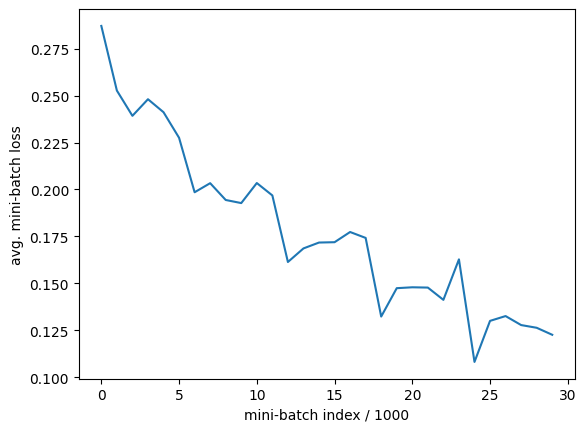

In [196]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

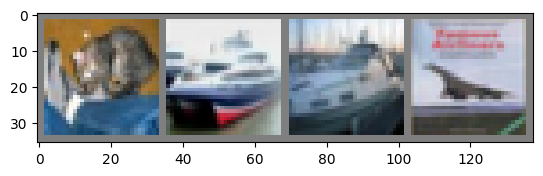

GroundTruth:    cat  ship  ship plane
Predicted:    cat plane plane plane


In [197]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net3(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [204]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

# to beat: 79 %

Accuracy of the network on the 10000 test images: 79 %


In [205]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net4(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    
# to beat
# Accuracy of plane : 83 %
# Accuracy of   car : 88 %
# Accuracy of  bird : 71 %
# Accuracy of   cat : 68 %
# Accuracy of  deer : 80 %
# Accuracy of   dog : 65 %
# Accuracy of  frog : 81 %
# Accuracy of horse : 85 %
# Accuracy of  ship : 85 %
# Accuracy of truck : 87 %

Accuracy of plane : 82 %
Accuracy of   car : 88 %
Accuracy of  bird : 70 %
Accuracy of   cat : 69 %
Accuracy of  deer : 79 %
Accuracy of   dog : 64 %
Accuracy of  frog : 81 %
Accuracy of horse : 85 %
Accuracy of  ship : 86 %
Accuracy of truck : 87 %


In [200]:
# Save your model's parameters to a file
torch.save(net.state_dict(), './net1_params.pth')
torch.save(net2.state_dict(), './net2_params.pth')
torch.save(net3.state_dict(), './net3_params.pth')
torch.save(net4.state_dict(), './net4_params.pth')

# Load your model's parameters from the saved file
# loaded_params = torch.load('./model_params.pth')
# net.load_state_dict(loaded_params)

# NET 5

In [5]:
class Net5(nn.Module): # Max pooling, larger kernels, wider
    def __init__(self):
        super(Net5, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.skip = nn.Conv2d(3, 16, kernel_size=8, stride=4, padding=2)
        self.skipBn1 = nn.BatchNorm2d(16)
        self.skipPool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.skip2 = nn.Conv2d(16, 64, kernel_size=1, stride=1, padding=0)
        self.skipBn2 = nn.BatchNorm2d(64)
        self.linSkip = nn.Linear(64*4*4, 128)
        # output = 16*4*4
        
        
        self.convA1 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
        self.bnA1 = nn.BatchNorm2d(64)
        self.poolA1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.convA2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bnA2 = nn.BatchNorm2d(128)
        self.poolA2 = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.convA3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
#         self.bnA3 = nn.BatchNorm2d(256)
#         self.poolA3 = nn.MaxPool2d(kernel_size=2, stride=2)
        # self.linA = nn.Linear(64*8*8, 512)
        self.linA = nn.Linear(128*4*4, 512)
        # self.linA = nn.Linear(256*2*2, 512)
        # output = 256*4*4
        
        
        self.convB1a = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bnB1a = nn.BatchNorm2d(64)
        self.convB1b = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bnB1b = nn.BatchNorm2d(64)
        self.poolB1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.convB2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bnB2 = nn.BatchNorm2d(128)
        self.poolB2 = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.convB3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
#         self.bnB3 = nn.BatchNorm2d(256)
#         self.poolB3 = nn.MaxPool2d(kernel_size=2, stride=2)
        # self.linB = nn.Linear(64*8*8, 512)
        self.linB = nn.Linear(128*4*4, 512)
        # self.linB = nn.Linear(256*2*2, 512)
        # output = 256*4*4
        
        
        self.convC1 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bnC1 = nn.BatchNorm2d(64)
        self.convC2 = nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2)
        self.bnC2 = nn.BatchNorm2d(128)
        # self.poolC2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # self.convC3 = nn.Conv2d(128, 256, kernel_size=5, stride=1, padding=2)
        # self.bnC3 = nn.BatchNorm2d(256)
        self.poolC = nn.MaxPool2d(kernel_size=2, stride=2)
        self.linC = nn.Linear(128*8*8, 512)
        # output = 256*8*8
        
        
        self.lin1 = nn.Linear(512+512+512+128, 256)
        self.lin2 = nn.Linear(256, 64)
        self.lin3 = nn.Linear(64, 10)
        
        self.drop3 = nn.Dropout(0.3)
        self.drop5 = nn.Dropout(0.5)
        self.drop7 = nn.Dropout(0.7)
        
        
    def forward(self, x):
        x1 = self.conv1(x)
        x1 = self.bn1(x1)
        nn.functional.relu(x1, inplace=True)
        x1 = self.conv2(x1)
        x1 = self.bn2(x1)
        nn.functional.relu(x1, inplace=True)
        x1 = self.pool2(x1)
        
        xSkip = self.skip(x)
        xSkip = self.skipBn1(xSkip)
        nn.functional.relu(xSkip, inplace=True)
        xSkip = self.skipPool(xSkip)
        xSkip = self.skip2(xSkip)
        xSkip = self.skipBn2(xSkip)
        nn.functional.relu(xSkip, inplace=True)
        xSkip = xSkip.view(-1, 64*4*4)
        xSkip = self.linSkip(xSkip)
        nn.functional.relu(xSkip, inplace=True)
        xSkip = self.drop7(xSkip)
        
        xA = self.convA1(x1)
        xA = self.bnA1(xA)
        nn.functional.relu(xA, inplace=True)
        xA = self.poolA1(xA)
        xA = self.convA2(xA)
        xA = self.bnA2(xA)
        nn.functional.relu(xA, inplace=True)
        xA = self.poolA2(xA)
#         xA = self.convA3(xA)
#         xA = self.bnA3(xA)
#         xA = nn.functional.relu(xA)
#         xA = self.poolA3(xA)
        xA = xA.view(-1, 128*4*4)
        xA = self.linA(xA)
        nn.functional.relu(xA, inplace=True)
        xA = self.drop5(xA)
        
        xB = self.convB1a(x1)
        xB = self.bnB1a(xB)
        nn.functional.relu(xB, inplace=True)
        xB = self.convB1b(xB)
        xB = self.bnB1b(xB)
        nn.functional.relu(xB, inplace=True)
        xB = self.poolB1(xB)
        xB = self.convB2(xB)
        xB = self.bnB2(xB)
        nn.functional.relu(xB, inplace=True)
        xB = self.poolB2(xB)
        xB = xB.view(-1, 128*4*4)
        xB = self.linB(xB)
        nn.functional.relu(xB, inplace=True)
        xB = self.drop5(xB)
        
        xC = self.convC1(x1)
        xC = self.bnC1(xC)
        nn.functional.relu(xC, inplace=True)
        xC = self.convC2(xC)
        xC = self.bnC2(xC)
        nn.functional.relu(xC, inplace=True)
#         xC = self.convC3(xC)
#         xC = self.bnC3(xC)
#         xC = nn.functional.relu(xC)
        xC = self.poolC(xC)
        xC = xC.view(-1, 128*8*8)
        xC = self.linC(xC)
        nn.functional.relu(xC, inplace=True)
        xC = self.drop5(xC)
        
        
        # print(xA.shape, xB.shape, xC.shape, xSkip.shape)
        xF = torch.cat([xA, xB, xC, xSkip], dim=1)
        xF = self.lin1(xF)
        xF = nn.functional.relu(xF)
        xF = self.drop5(xF)
        xF = self.lin2(xF)
        xF = nn.functional.relu(xF)
        xF = self.lin3(xF)
        
        return xF

net5 = Net5()     # Create the network instance.
net5.to(device)  # Move the network parameters to the specified device.

Net5(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (skip): Conv2d(3, 16, kernel_size=(8, 8), stride=(4, 4), padding=(2, 2))
  (skipBn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (skipPool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (skip2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
  (skipBn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linSkip): Linear(in_features=1024, out_features=128, bias=True)
  (convA1): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bnA1): BatchNorm2d(64, eps=1e-05, momentum=0.1,

In [37]:
class NetE(nn.Module): # Max pooling, larger kernels, wider
    def __init__(self):
        super(NetE, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.passConv = nn.Conv2d(3, 16, kernel_size=8, stride=4, padding=2)
        self.passBn1 = nn.BatchNorm2d(16)
        self.passPool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.passConv2 = nn.Conv2d(16, 64, kernel_size=1, stride=1, padding=0)
        self.passBn2 = nn.BatchNorm2d(64)
        self.passLin = nn.Linear(64*4*4, 128)
        # output = 16*4*4
        
        
        # takes x1
        self.convA1 = nn.Conv2d(16, 64, kernel_size=5, stride=1, padding=2)
        self.bnA1 = nn.BatchNorm2d(64)
        self.poolA1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # self.convA2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        # self.bnA2 = nn.BatchNorm2d(128)
        # self.poolA2 = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.convA3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
#         self.bnA3 = nn.BatchNorm2d(256)
#         self.poolA3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.linA = nn.Linear(64*8*8, 512)
        # self.linA = nn.Linear(128*4*4, 512)
        # self.linA = nn.Linear(256*2*2, 512)
        # output = 256*4*4
        
        
        # takes x2
        self.convB1a = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bnB1a = nn.BatchNorm2d(64)
        self.convB1b = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bnB1b = nn.BatchNorm2d(128)
        self.poolB1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # self.convB2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        # self.bnB2 = nn.BatchNorm2d(128)
        # self.poolB2 = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.convB3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
#         self.bnB3 = nn.BatchNorm2d(256)
#         self.poolB3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.linB = nn.Linear(128*4*4, 512)
        # self.linB = nn.Linear(128*4*4, 512)
        # self.linB = nn.Linear(256*2*2, 512)
        # output = 256*4*4
        
        
        # takes x2
        self.convC1 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
        self.bnC1 = nn.BatchNorm2d(64)
        self.poolC1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.convC2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bnC2 = nn.BatchNorm2d(128)
        self.poolC2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.linC = nn.Linear(128*2*2, 512)
        # output = 256*8*8
        
        
        # takes x1
        self.convD1 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.bnD1 = nn.BatchNorm2d(32)
        self.poolD1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.convD2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bnD2 = nn.BatchNorm2d(64)
        self.poolD2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.linD = nn.Linear(64*4*4, 512)
        
        
        # JUST A, B, and pass currently
        self.lin1 = nn.Linear(512+512+128, 256)
        self.lin2 = nn.Linear(256, 64)
        self.lin3 = nn.Linear(64, 10)
        
        self.drop3 = nn.Dropout(0.3)
        self.drop5 = nn.Dropout(0.5)
        self.drop7 = nn.Dropout(0.7)
        
        
    def forward(self, x):
        x1 = self.conv1(x)
        x1 = self.bn1(x1)
        nn.functional.relu(x1, inplace=True)
        x1 = self.pool1(x1)
        x2 = self.conv2(x1)
        x2 = self.bn2(x2)
        nn.functional.relu(x2, inplace=True)
        x2 = self.pool2(x2)
        
        xPass = self.passConv(x)
        xPass = self.passBn1(xPass)
        nn.functional.relu(xPass, inplace=True)
        xPass = self.passPool(xPass)
        xPass = self.passConv2(xPass)
        xPass = self.passBn2(xPass)
        nn.functional.relu(xPass, inplace=True)
        xPass = xPass.view(-1, 64*4*4)
        xPass = self.passLin(xPass)
        nn.functional.relu(xPass, inplace=True)
        xPass = self.drop7(xPass)
        
        xA = self.convA1(x1)
        xA = self.bnA1(xA)
        nn.functional.relu(xA, inplace=True)
        xA = self.poolA1(xA)
        xA = xA.view(-1, 64*8*8)
        xA = self.linA(xA)
        nn.functional.relu(xA, inplace=True)
        xA = self.drop3(xA)
        
        xB = self.convB1a(x2)
        xB = self.bnB1a(xB)
        nn.functional.relu(xB, inplace=True)
        xB = self.convB1b(xB)
        xB = self.bnB1b(xB)
        nn.functional.relu(xB, inplace=True)
        xB = self.poolB1(xB)
        xB = xB.view(-1, 128*4*4)
        xB = self.linB(xB)
        nn.functional.relu(xB, inplace=True)
        xB = self.drop3(xB)
        
#         xC = self.convC1(x2)
#         xC = self.bnC1(xC)
#         nn.functional.relu(xC, inplace=True)
#         xC = self.poolC1(xC)
#         xC = self.convC2(xC)
#         xC = self.bnC2(xC)
#         nn.functional.relu(xC, inplace=True)
#         xC = self.poolC2(xC)
#         xC = xC.view(-1, 128*2*2)
#         xC = self.linC(xC)
#         nn.functional.relu(xC, inplace=True)
#         xC = self.drop3(xC)
        
#         xD = self.convD1(x1)
#         xD = self.bnD1(xD)
#         nn.functional.relu(xD, inplace=True)
#         xD = self.poolD1(xD)
#         xD = self.convD2(xD)
#         xD = self.bnD2(xD)
#         nn.functional.relu(xD, inplace=True)
#         xD = self.poolD2(xD)
#         xD = xD.view(-1, 64*4*4)
#         xD = self.linD(xD)
#         nn.functional.relu(xD, inplace=True)
#         xD = self.drop5(xD)
        
        
        # print(xA.shape, xB.shape, xC.shape, xSkip.shape)
        xF = torch.cat([xA, xB, xPass], dim=1)
        xF = self.lin1(xF)
        xF = nn.functional.relu(xF)
        xF = self.drop5(xF)
        xF = self.lin2(xF)
        xF = nn.functional.relu(xF)
        # xF = self.drop5(xF)
        xF = self.lin3(xF)
        
        return xF

netE = NetE()     # Create the network instance.
netE.to(device)  # Move the network parameters to the specified device.

NetE(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (passConv): Conv2d(3, 16, kernel_size=(8, 8), stride=(4, 4), padding=(2, 2))
  (passBn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (passPool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (passConv2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
  (passBn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (passLin): Linear(in_features=1024, out_features=128, bias=True)
  (convA1): Conv2d(16, 64, kernel_

In [46]:
class Net4R(nn.Module): # Max pooling, larger kernels, wider
    def __init__(self):
        super(Net4R, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # self.skip = nn.Conv2d(3, 16, kernel_size=8, stride=4, padding=2)
        # self.skipBn = nn.BatchNorm2d(8)
        # self.skipPool = nn.AvgPool2d(kernel_size=2, stride=2)
        # output = 16*4*4
        
        
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=5, stride=1, padding=2)
        self.bn5 = nn.BatchNorm2d(256)
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.lin1R = nn.Linear(16*16*16, 64)
        self.lin2R = nn.Linear(32*16*16, 128)
        self.lin3R = nn.Linear(64*8*8, 256)
        self.lin4R = nn.Linear(128*8*8, 128)
        self.lin5R = nn.Linear(256*4*4, 256)
        
        self.lin1 = nn.Linear(64+128+256+128+256, 256)
        self.lin2 = nn.Linear(256, 64)
        self.lin3 = nn.Linear(64, 10)
        
        self.drop = nn.Dropout(0.5)
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        nn.functional.relu(x, inplace=True)
        x = self.pool1(x)
        x1 = x.view(-1, 16*16*16)
        x1 = self.lin1R(x1)
        nn.functional.relu(x1, inplace=True)
        x1 = self.drop(x1)
        
        x = self.conv2(x)
        x = self.bn2(x)
        nn.functional.relu(x, inplace=True)
        x2 = x.view(-1, 32*16*16)
        x2 = self.lin2R(x2)
        x2 = nn.functional.relu(x2)
        x = self.conv3(x)
        x = self.bn3(x)
        nn.functional.relu(x, inplace=True)
        x = self.pool3(x)
        x3 = x.view(-1, 64*8*8)
        x3 = self.lin3R(x3)
        nn.functional.relu(x3, inplace=True)
        x3 = self.drop(x3)
        
        x = self.conv4(x)
        x = self.bn4(x)
        nn.functional.relu(x, inplace=True)
        x4 = x.view(-1, 128*8*8)
        x4 = self.lin4R(x4)
        nn.functional.relu(x4, inplace=True)
        x = self.conv5(x)
        x = self.bn5(x)
        nn.functional.relu(x, inplace=True)
        x = self.pool5(x)
        x5 = x.view(-1, 256*4*4)
        x5 = self.lin5R(x5)
        nn.functional.relu(x5, inplace=True)
        
        x = torch.cat([x1, x2, x3, x4, x5], dim=1)
        x = self.lin1(x)
        nn.functional.relu(x, inplace=True)
        x = self.drop(x)
        x = self.lin2(x)
        nn.functional.relu(x, inplace=True)
        x = self.lin3(x)
        
        return x

net4R = Net4R()     # Create the network instance.
net4R.to(device)  # Move the network parameters to the specified device.

Net4R(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running

running 4R!
[epoch: 0, i:   999] avg mini-batch loss: 0.111
[epoch: 0, i:  1999] avg mini-batch loss: 0.091
[epoch: 0, i:  2999] avg mini-batch loss: 0.081
[epoch: 0, i:  3999] avg mini-batch loss: 0.092
[epoch: 0, i:  4999] avg mini-batch loss: 0.082
[epoch: 0, i:  5999] avg mini-batch loss: 0.077
[epoch: 0] avg mini-batch loss: 0.077
running 4R!
[epoch: 1, i:   999] avg mini-batch loss: 0.055
[epoch: 1, i:  1999] avg mini-batch loss: 0.049
[epoch: 1, i:  2999] avg mini-batch loss: 0.061
[epoch: 1, i:  3999] avg mini-batch loss: 0.067
[epoch: 1, i:  4999] avg mini-batch loss: 0.057
[epoch: 1, i:  5999] avg mini-batch loss: 0.050
[epoch: 1] avg mini-batch loss: 0.050
running 4R!
[epoch: 2, i:   999] avg mini-batch loss: 0.043
[epoch: 2, i:  1999] avg mini-batch loss: 0.044
[epoch: 2, i:  2999] avg mini-batch loss: 0.043
[epoch: 2, i:  3999] avg mini-batch loss: 0.044
[epoch: 2, i:  4999] avg mini-batch loss: 0.046
[epoch: 2, i:  5999] avg mini-batch loss: 0.038
[epoch: 2] avg mini-batc

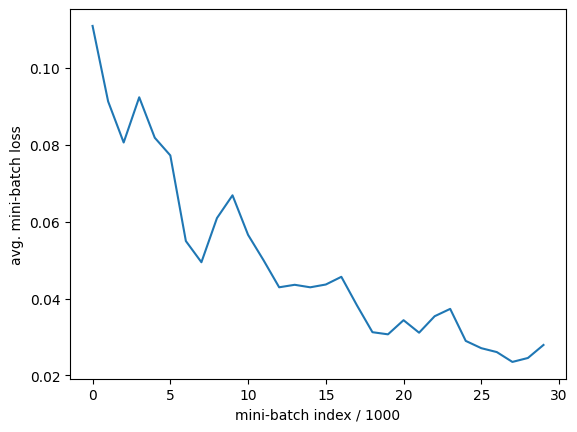

In [56]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(net4R.parameters(), lr=0.0005, momentum=0.8) # weight_decay=1e-5 ??

avg_losses = []   # Avg. losses.
epochs = 5       # Total epochs.
print_freq = 1000  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    print("running 4R!")
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net4R(inputs)
        # print(inputs.shape, outputs.shape)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            avg_losses.append(avg_loss)
            running_loss = 0.0
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
    print('[epoch: {}] avg mini-batch loss: {:.3f}'.format(epoch, avg_losses[len(avg_losses)-1]))

print('Finished Training.')

plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

In [57]:
# Save your model's parameters to a file
torch.save(net4R.state_dict(), './net4R_params_3.pth')

# Load your model's parameters from the saved file
# loaded_params = torch.load('./model_params.pth')
# net.load_state_dict(loaded_params)

running E!
[epoch: 0, i:   999] avg mini-batch loss: 0.139
[epoch: 0, i:  1999] avg mini-batch loss: 0.145
[epoch: 0, i:  2999] avg mini-batch loss: 0.152
[epoch: 0, i:  3999] avg mini-batch loss: 0.143
[epoch: 0, i:  4999] avg mini-batch loss: 0.136
[epoch: 0, i:  5999] avg mini-batch loss: 0.129
[epoch: 0] avg mini-batch loss: 0.129
running E!
[epoch: 1, i:   999] avg mini-batch loss: 0.128
[epoch: 1, i:  1999] avg mini-batch loss: 0.115
[epoch: 1, i:  2999] avg mini-batch loss: 0.104
[epoch: 1, i:  3999] avg mini-batch loss: 0.119
[epoch: 1, i:  4999] avg mini-batch loss: 0.113
[epoch: 1, i:  5999] avg mini-batch loss: 0.118
[epoch: 1] avg mini-batch loss: 0.118
running E!
[epoch: 2, i:   999] avg mini-batch loss: 0.099
[epoch: 2, i:  1999] avg mini-batch loss: 0.093
[epoch: 2, i:  2999] avg mini-batch loss: 0.105
[epoch: 2, i:  3999] avg mini-batch loss: 0.098
[epoch: 2, i:  4999] avg mini-batch loss: 0.102
[epoch: 2, i:  5999] avg mini-batch loss: 0.103
[epoch: 2] avg mini-batch l

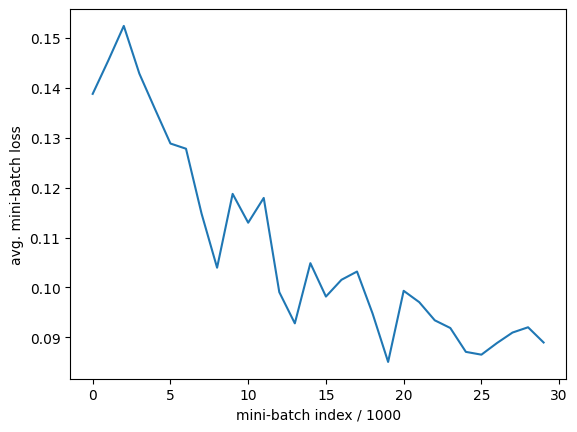

In [38]:
# netE.load_state_dict(torch.load('./netE_params_2.pth'))

# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(netE.parameters(), lr=0.0005, momentum=0.7, weight_decay=1e-5)

avg_losses = []   # Avg. losses.
epochs = 5       # Total epochs.
print_freq = 1000  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    print("running E!")
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = netE(inputs)
        # print(inputs.shape, outputs.shape)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            avg_losses.append(avg_loss)
            running_loss = 0.0
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
    print('[epoch: {}] avg mini-batch loss: {:.3f}'.format(epoch, avg_losses[len(avg_losses)-1]))

print('Finished Training.')

plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

In [41]:
# Save your model's parameters to a file
torch.save(netE.state_dict(), './netE_params_drop1.pth')

# Load your model's parameters from the saved file
# loaded_params = torch.load('./netE_params_2.pth')
# netE.load_state_dict(loaded_params)

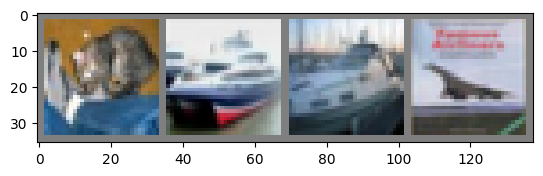

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship plane plane


In [58]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net4R(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [59]:
# Get train accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net4R(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 99 %


In [60]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net4R(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

# to beat: 79 % (4) (5 layer conv, 256 width)
# -> 83 % (5 old) (3 parallel, skip, 5 layers deep, 256 width)
# -> 77 (first 10 of 5 new)
# -> 76 (first 10 of E) -> 78 (after 4? fine-tune epochs) -> 76 (after more dropout)
# 78 4R (after 15 - clearly overfit)

Accuracy of the network on the 10000 test images: 78 %


In [61]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = netE(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    
# to beat
# Accuracy of plane : 83 %
# Accuracy of   car : 88 %
# Accuracy of  bird : 71 %
# Accuracy of   cat : 68 %
# Accuracy of  deer : 80 %
# Accuracy of   dog : 65 %
# Accuracy of  frog : 81 %
# Accuracy of horse : 85 %
# Accuracy of  ship : 85 %
# Accuracy of truck : 87 %

# to beat (5 old)
# Accuracy of plane : 87 %
# Accuracy of   car : 92 %
# Accuracy of  bird : 75 %
# Accuracy of   cat : 70 %
# Accuracy of  deer : 81 %
# Accuracy of   dog : 72 %
# Accuracy of  frog : 87 %
# Accuracy of horse : 86 %
# Accuracy of  ship : 89 %
# Accuracy of truck : 90 %

# first 10 (5 new)
# Accuracy of plane : 85 %
# Accuracy of   car : 88 %
# Accuracy of  bird : 64 %
# Accuracy of   cat : 61 %
# Accuracy of  deer : 74 %
# Accuracy of   dog : 77 %
# Accuracy of  frog : 78 %
# Accuracy of horse : 80 %
# Accuracy of  ship : 86 %
# Accuracy of truck : 85 %

# EEEEEEEEEEEEEEEEEEEEEE - ONLY DROP5 ON LIN1 and PASS
# Accuracy of plane : 81 % -> 81
# Accuracy of   car : 83 % -> 87
# Accuracy of  bird : 68 % -> 68
# Accuracy of   cat : 50 % -> 65
# Accuracy of  deer : 72 % -> 75
# Accuracy of   dog : 73 % -> 68
# Accuracy of  frog : 81 % -> 81
# Accuracy of horse : 75 % -> 81
# Accuracy of  ship : 87 % -> 86
# Accuracy of truck : 89 % -> 85

# EEEEEEEEEEEEEEEEEEEEEE - more dropout
# Accuracy of plane : 79 %
# Accuracy of   car : 84 %
# Accuracy of  bird : 66 %
# Accuracy of   cat : 59 %
# Accuracy of  deer : 73 %
# Accuracy of   dog : 66 %
# Accuracy of  frog : 82 %
# Accuracy of horse : 81 %
# Accuracy of  ship : 86 %
# Accuracy of truck : 86 %

Accuracy of plane : 82 %
Accuracy of   car : 84 %
Accuracy of  bird : 65 %
Accuracy of   cat : 58 %
Accuracy of  deer : 70 %
Accuracy of   dog : 64 %
Accuracy of  frog : 82 %
Accuracy of horse : 81 %
Accuracy of  ship : 86 %
Accuracy of truck : 88 %


In [62]:
# nn.functional.relu?

G = torch.tensor([0,-1,1])
G.relu(), nn.functional.relu(G, inplace=True), G

nn.Flatten?

In [ ]:
# class Net5(nn.Module): # OLD
#     def __init__(self):
#         super(Net5, self).__init__()
#         self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2)
#         self.bn1 = nn.BatchNorm2d(16)
#         self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
#         self.bn2 = nn.BatchNorm2d(32)
#         self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
#         self.skip = nn.Conv2d(3, 16, kernel_size=8, stride=4, padding=2)
#         self.skipBn1 = nn.BatchNorm2d(16)
#         self.skipPool = nn.AvgPool2d(kernel_size=2, stride=2)
#         self.skip2 = nn.Conv2d(16, 64, kernel_size=1, stride=1, padding=0)
#         self.skipBn2 = nn.BatchNorm2d(64)
#         self.linSkip = nn.Linear(64*4*4, 128)
#         # output = 16*4*4
        
        
#         self.convA1 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
#         self.bnA1 = nn.BatchNorm2d(64)
#         self.convA2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
#         self.bnA2 = nn.BatchNorm2d(128)
#         self.poolA2 = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.convA3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
#         self.bnA3 = nn.BatchNorm2d(256)
#         self.poolA3 = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.linA = nn.Linear(256*4*4, 512)
#         # output = 256*4*4
        
#         self.convB1 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
#         self.bnB1 = nn.BatchNorm2d(64)
#         self.convB2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
#         self.bnB2 = nn.BatchNorm2d(128)
#         self.poolB2 = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.convB3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
#         self.bnB3 = nn.BatchNorm2d(256)
#         self.poolB3 = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.linB = nn.Linear(256*4*4, 512)
#         # output = 256*4*4
        
#         self.convC1 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
#         self.bnC1 = nn.BatchNorm2d(64)
#         self.convC2 = nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2)
#         self.bnC2 = nn.BatchNorm2d(128)
#         # self.poolC2 = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.convC3 = nn.Conv2d(128, 256, kernel_size=5, stride=1, padding=2)
#         self.bnC3 = nn.BatchNorm2d(256)
#         self.poolC3 = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.linC = nn.Linear(256*8*8, 512)
#         # output = 256*8*8
        
        
#         self.lin1 = nn.Linear(512+512+512+128, 256)
#         self.lin2 = nn.Linear(256, 64)
#         self.lin3 = nn.Linear(64, 10)
        
#         self.drop3 = nn.Dropout(0.3)
#         self.drop5 = nn.Dropout(0.5)
#         self.drop7 = nn.Dropout(0.7)
        
        
#     def forward(self, x):
#         x1 = self.conv1(x)
#         x1 = self.bn1(x1)
#         x1 = nn.functional.relu(x1)
#         x1 = self.conv2(x1)
#         x1 = self.bn2(x1)
#         x1 = nn.functional.relu(x1)
#         x1 = self.pool2(x1)
        
#         xSkip = self.skip(x)
#         xSkip = self.skipBn1(xSkip)
#         xSkip = nn.functional.relu(xSkip)
#         xSkip = self.skipPool(xSkip)
#         xSkip = self.skip2(xSkip)
#         xSkip = self.skipBn2(xSkip)
#         xSkip = nn.functional.relu(xSkip)
#         xSkip = xSkip.view(-1, 64*4*4)
#         xSkip = self.linSkip(xSkip)
#         xSkip = nn.functional.relu(xSkip)
#         xSkip = self.drop7(xSkip)
        
#         xA = self.convA1(x1)
#         xA = self.bnA1(xA)
#         xA = nn.functional.relu(xA)
#         xA = self.convA2(xA)
#         xA = self.bnA2(xA)
#         xA = nn.functional.relu(xA)
#         xA = self.poolA2(xA)
#         xA = self.convA3(xA)
#         xA = self.bnA3(xA)
#         xA = nn.functional.relu(xA)
#         xA = self.poolA3(xA)
#         xA = xA.view(-1, 256*4*4)
#         xA = self.linA(xA)
#         xA = nn.functional.relu(xA)
#         xA = self.drop5(xA)
        
#         xB = self.convB1(x1)
#         xB = self.bnB1(xB)
#         xB = nn.functional.relu(xB)
#         xB = self.convB2(xB)
#         xB = self.bnB2(xB)
#         xB = nn.functional.relu(xB)
#         xB = self.poolB2(xB)
#         xB = self.convB3(xB)
#         xB = self.bnB3(xB)
#         xB = nn.functional.relu(xB)
#         xB = self.poolB3(xB)
#         xB = xB.view(-1, 256*4*4)
#         xB = self.linB(xB)
#         xB = nn.functional.relu(xB)
#         xB = self.drop5(xB)
        
#         xC = self.convC1(x1)
#         xC = self.bnC1(xC)
#         xC = nn.functional.relu(xC)
#         xC = self.convC2(xC)
#         xC = self.bnC2(xC)
#         xC = nn.functional.relu(xC)
#         xC = self.convC3(xC)
#         xC = self.bnC3(xC)
#         xC = nn.functional.relu(xC)
#         xC = self.poolC3(xC)
#         xC = xC.view(-1, 256*8*8)
#         xC = self.linC(xC)
#         xC = nn.functional.relu(xC)
#         xC = self.drop5(xB)
        
        
#         # print(xA.shape, xB.shape, xC.shape, xSkip.shape)
#         xF = torch.cat([xA, xB, xC, xSkip], dim=1)
#         xF = self.lin1(xF)
#         xF = nn.functional.relu(xF)
#         xF = self.drop5(xF)
#         xF = self.lin2(xF)
#         xF = nn.functional.relu(xF)
#         xF = self.lin3(xF)
        
#         return xF

# net5 = Net5()     # Create the network instance.
# net5.to(device)  # Move the network parameters to the specified device.